In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

2023-09-29 18:44:27.761998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.keras.backend.clear_session()

In [3]:
np.random.seed(1357)

In [4]:
#Loading the datset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Checking #row
df.shape

(768, 9)

In [6]:
sum(df['Outcome']==1)


268

In [7]:
#Checking for null value - no null value
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Checking if there is any zero value

for col_name in df.columns:
    column = df[col_name]
    count = (column == 0).sum()
    print("Number of 0 in column", col_name, "=", count)




Number of 0 in column Pregnancies = 111
Number of 0 in column Glucose = 5
Number of 0 in column BloodPressure = 35
Number of 0 in column SkinThickness = 227
Number of 0 in column Insulin = 374
Number of 0 in column BMI = 11
Number of 0 in column DiabetesPedigreeFunction = 0
Number of 0 in column Age = 0
Number of 0 in column Outcome = 500


In [9]:
#Impute zero by mean in column "Glucose","BloodPressure","SkinThickness","Insulin","BMI"

select_col = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for col in select_col:
    df[col] = df[col].replace(0, np.NaN)
    mean = int(df[col].mean(skipna=True))
    df[col] = df[col].replace(np.NaN, mean)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
#Checking if there is any zero value again

for col_name in df.columns:
    column = df[col_name]
    count = (column == 0).sum()
    print("Number of 0 in column", col_name, "=", count)

Number of 0 in column Pregnancies = 111
Number of 0 in column Glucose = 0
Number of 0 in column BloodPressure = 0
Number of 0 in column SkinThickness = 0
Number of 0 in column Insulin = 0
Number of 0 in column BMI = 0
Number of 0 in column DiabetesPedigreeFunction = 0
Number of 0 in column Age = 0
Number of 0 in column Outcome = 500


In [11]:
#Splitting the data
X = df.drop(['Outcome'], axis=1)
y = df["Outcome"]
print(X.head())
print("shape of X", X.shape)
print(y.head())
print("shape of Y", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    155.0  33.6   
1            1     85.0           66.0           29.0    155.0  26.6   
2            8    183.0           64.0           29.0    155.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
shape of X (768, 8)
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
shape of Y (768,)


In [12]:
#Checking shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(537, 8)
(231, 8)
(537,)
(231,)


In [13]:
#Scaleing the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
#Creating model 1

model1 = Sequential()

#Input layer + 1st hidden layer
model1.add(Dense(8, input_dim=8,activation="relu"))

#Output layer
model1.add(Dense(1,activation="sigmoid"))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


2023-09-29 18:44:45.248238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
#Train the model
history = model1.fit(
      X_train_scaled,
      y_train,
      epochs=10,
      verbose=1,
      validation_split=0.2)

Epoch 1/10


14/14 [==============================] - 1s 15ms/step - loss: 0.8367 - accuracy: 0.3380 - val_loss: 0.8040 - val_accuracy: 0.3426
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 0.8055 - accuracy: 0.3613 - val_loss: 0.7766 - val_accuracy: 0.3519
Epoch 3/10
14/14 [==============================] - 0s 4ms/step - loss: 0.7790 - accuracy: 0.3636 - val_loss: 0.7493 - val_accuracy: 0.3796
Epoch 4/10
14/14 [==============================] - 0s 4ms/step - loss: 0.7540 - accuracy: 0.4009 - val_loss: 0.7266 - val_accuracy: 0.4444
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.7313 - accuracy: 0.4382 - val_loss: 0.7050 - val_accuracy: 0.5185
Epoch 6/10
14/14 [==============================] - 0s 4ms/step - loss: 0.7093 - accuracy: 0.5082 - val_loss: 0.6862 - val_accuracy: 0.5185
Epoch 7/10
14/14 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5501 - val_loss: 0.6681 - val_accuracy: 0.5463
Epoch 8/10
14/14 [============

In [16]:
## Plot the Training and Validation loss
def plot(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  plt.figure()
  plt.plot(epochs, accuracy, 'r', label='Training acc')
  plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
  plt.title('Training and validation acc')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

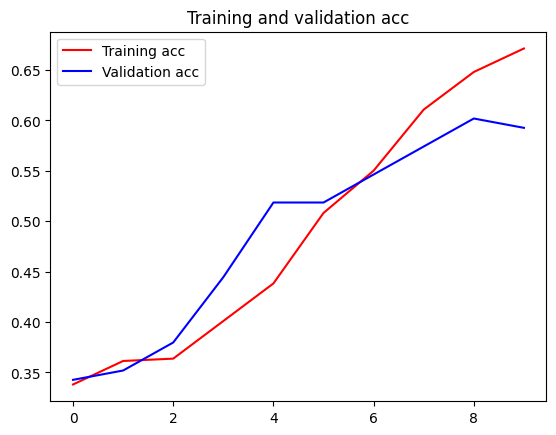

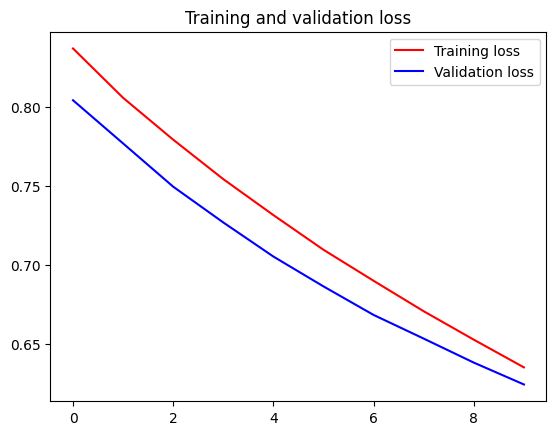

In [17]:
plot(history)

In [18]:
#Model improvement
#Improve model complexity and capacity to capture more information

model2 = Sequential()

#Input layer + 1st hidden layer
model2.add(Dense(8, input_dim=8,activation="relu"))

#Next hidden layers
model2.add(Dense(16, activation='relu'))
model2.add(Dense(32, activation='relu'))

#Output layer
model2.add(Dense(1,activation="sigmoid"))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 793
Trainable params: 793
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Train model2
history2 = model2.fit(
      X_train_scaled,
      y_train,
      epochs=20,
      verbose=1,
      validation_split=0.2)

Epoch 1/20
14/14 [==============================] - 1s 12ms/step - loss: 0.7077 - accuracy: 0.3916 - val_loss: 0.6762 - val_accuracy: 0.5556
Epoch 2/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.6480 - val_loss: 0.6583 - val_accuracy: 0.7130
Epoch 3/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.7273 - val_loss: 0.6409 - val_accuracy: 0.7222
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.7529 - val_loss: 0.6193 - val_accuracy: 0.7500
Epoch 5/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5832 - accuracy: 0.7459 - val_loss: 0.5968 - val_accuracy: 0.7407
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7529 - val_loss: 0.5745 - val_accuracy: 0.7315
Epoch 7/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7529 - val_loss: 0.5585 - val_accuracy: 0.7315
Epoch 8/20
14/14 [=

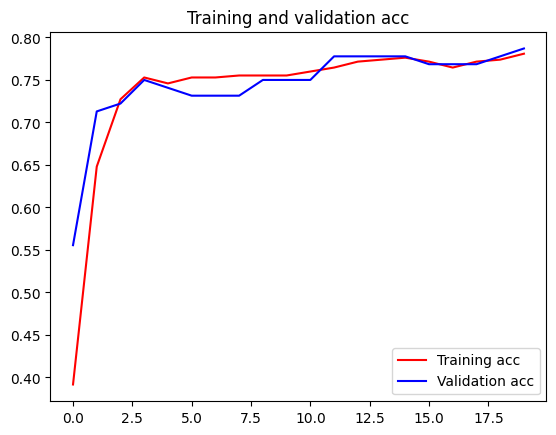

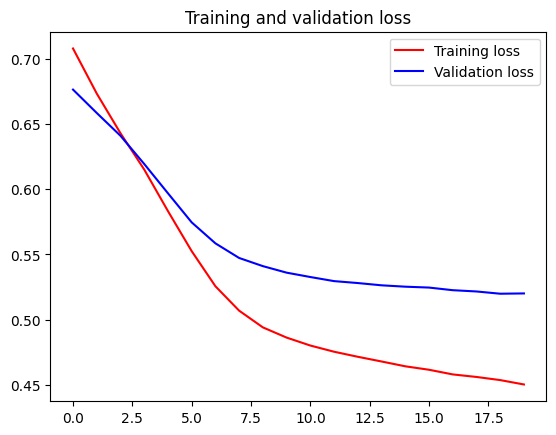

In [20]:
plot(history2)

In [21]:
#Train model2 + epochs
history2_100 = model2.fit(
      X_train_scaled,
      y_train,
      epochs=100,
      verbose=1,
      validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4487 - accuracy: 0.7786 - val_loss: 0.5166 - val_accuracy: 0.7870
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.7786 - val_loss: 0.5159 - val_accuracy: 0.7778
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4434 - accuracy: 0.7902 - val_loss: 0.5164 - val_accuracy: 0.7870
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.7879 - val_loss: 0.5149 - val_accuracy: 0.7870
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4390 - accuracy: 0.7879 - val_loss: 0.5150 - val_accuracy: 0.7870
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.7855 - val_loss: 0.5152 - val_accuracy: 0.7870
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.7832 - val_loss: 0.5151 - val_accuracy: 0.7870
Epoch 8/100
1

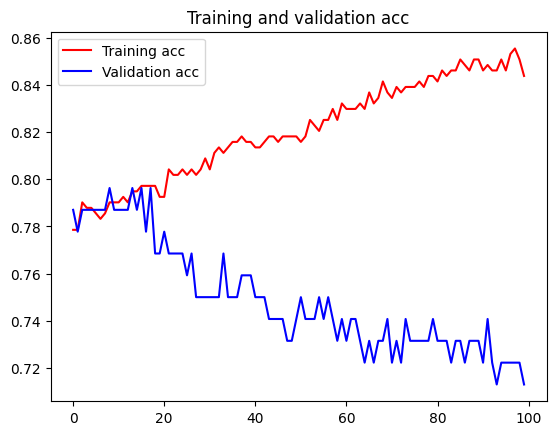

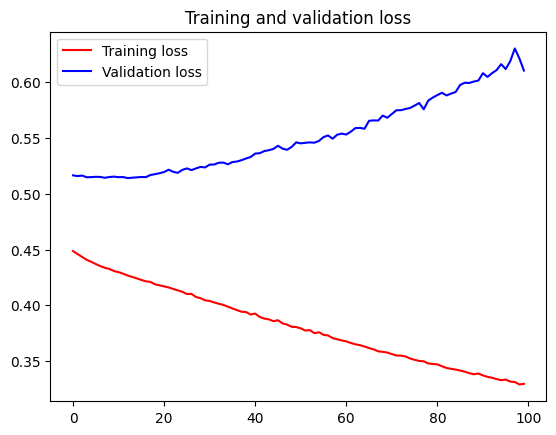

In [22]:
plot(history2_100)

In [23]:
#Model improvement
#Improve model complexity and capacity to capture more information

model3 = Sequential()

#Input layer + 1st hidden layer
model3.add(Dense(8, input_dim=8,activation="relu"))

#Next hidden layers
model3.add(Dense(16, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(64, activation='relu'))

#Output layer
model3.add(Dense(1,activation="sigmoid"))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,937
Trainable params: 2,937
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Train model3
history3 = model3.fit(
      X_train_scaled,
      y_train,
      epochs=20,
      verbose=1,
      validation_split=0.2)

Epoch 1/20
14/14 [==============================] - 1s 16ms/step - loss: 0.6619 - accuracy: 0.6643 - val_loss: 0.6604 - val_accuracy: 0.5926
Epoch 2/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.6620 - val_loss: 0.6405 - val_accuracy: 0.5926
Epoch 3/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.6620 - val_loss: 0.6111 - val_accuracy: 0.5926
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5535 - accuracy: 0.6760 - val_loss: 0.5805 - val_accuracy: 0.6389
Epoch 5/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7366 - val_loss: 0.5451 - val_accuracy: 0.7130
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5060 - accuracy: 0.7669 - val_loss: 0.5292 - val_accuracy: 0.7222
Epoch 7/20
14/14 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.7716 - val_loss: 0.5189 - val_accuracy: 0.7500
Epoch 8/20
14/14 [=

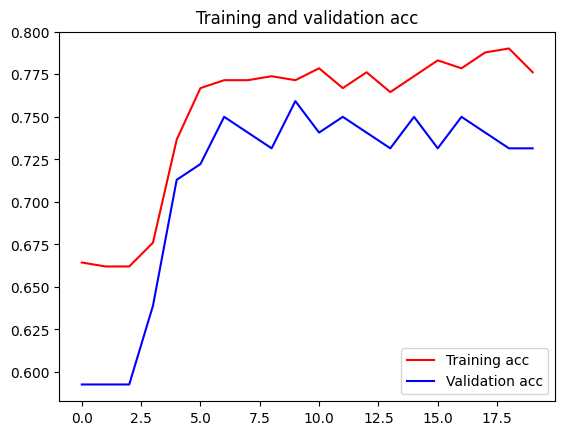

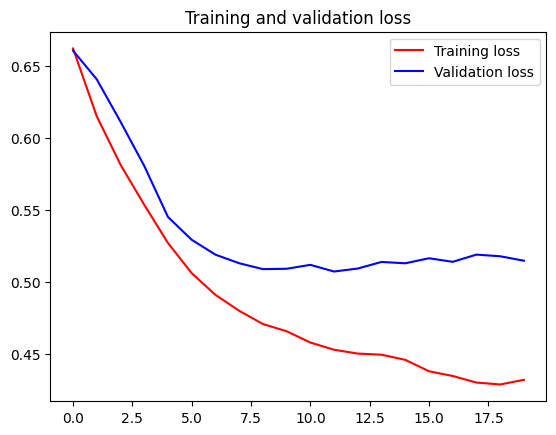

In [25]:
plot(history3)

In [26]:
history3_100 = model3.fit(
      X_train_scaled,
      y_train,
      epochs=100,
      verbose=1,
      validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4230 - accuracy: 0.7879 - val_loss: 0.5228 - val_accuracy: 0.7315
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.7949 - val_loss: 0.5191 - val_accuracy: 0.7222
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.7855 - val_loss: 0.5235 - val_accuracy: 0.7222
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.7832 - val_loss: 0.5210 - val_accuracy: 0.7222
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.7879 - val_loss: 0.5273 - val_accuracy: 0.7130
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4153 - accuracy: 0.7902 - val_loss: 0.5294 - val_accuracy: 0.7222
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.7879 - val_loss: 0.5301 - val_accuracy: 0.7222
Epoch 8/100
1

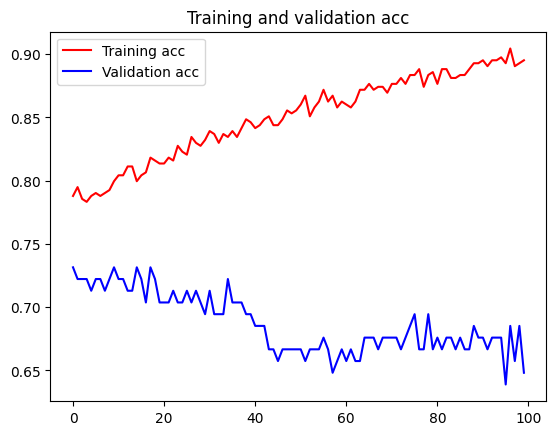

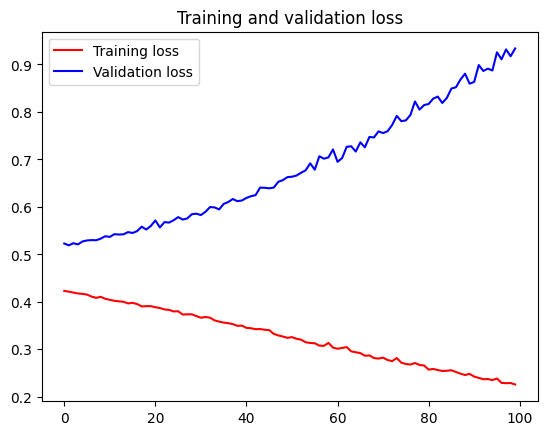

In [27]:
plot(history3_100)

In [28]:
# Create an instance of the Adam optimizer
optimizer = Adam()

# Access and print the default learning rate
print("Default Learning Rate for Adam:", optimizer.learning_rate.numpy())

Default Learning Rate for Adam: 0.001


# Model 2 + learning rate tuning

In [29]:
#Model improvement
#Improve model complexity and capacity to capture more information

model2_lr = Sequential()

#Input layer + 1st hidden layer
model2_lr.add(Dense(8, input_dim=8,activation="relu"))

#Next hidden layers
model2_lr.add(Dense(16, activation='relu'))
model2_lr.add(Dense(32, activation='relu'))

#Output layer
model2_lr.add(Dense(1,activation="sigmoid"))
model2_lr.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_lr.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 16)                144       
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 793
Trainable params: 793
Non-trainable params: 0
_________________________________________________________________


/Users/natashakwan/opt/anaconda3/envs/tf/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


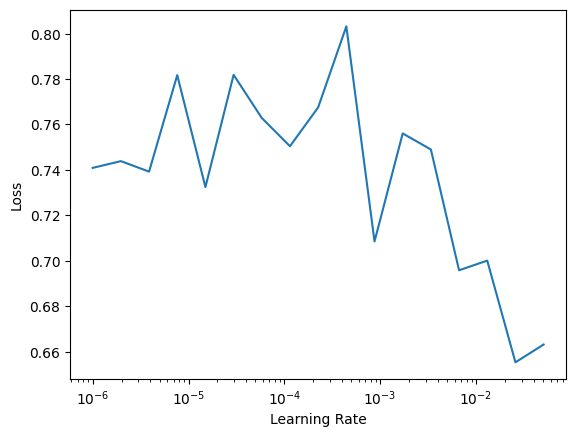

In [30]:
from tensorflow.keras import backend as K

# Define starting and ending learning rate and the step size
start_lr = 1e-6
end_lr = 1e-1
step_size = np.ceil((len(X_train_scaled) / 32))

# Initialize the model and optimizer
model = model2_lr  
optimizer = tf.keras.optimizers.Adam(lr=start_lr)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Store losses and learning rates
losses = []
lrs = []

# Iterate over increasing learning rates
for batch in range(int(step_size)):
    # Select the batch of data
    start = batch * 32
    end = start + 32
    X_batch = X_train_scaled[start:end]
    y_batch = y_train.to_numpy()[start:end]
    
    # Set learning rate and train model on batch
    lr = start_lr * (end_lr / start_lr) ** (batch / step_size)
    K.set_value(model.optimizer.learning_rate, lr)
    loss = model.train_on_batch(X_batch, y_batch)
    
    # Store loss and learning rate
    losses.append(loss[0])
    lrs.append(lr)
    
# Plot loss as a function of learning rate
plt.plot(lrs, losses)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

Choose a learning rate value that is in the middle of the descending loss, just before it starts to increase again to 
1. Avoids Too Small Learning Rate:
Slow Convergence: If the learning rate is too small, the model will learn very slowly, and it might take a considerable amount of time to converge to the minimum.
Risk of Not Converging: The model might get stuck and not converge to the minimum if the learning rate is too small.
2. Avoids Too High Learning Rate:
Overshooting: If the learning rate is too high, the model might overshoot the minimum and may fail to converge, causing loss to oscillate or diverge.
Numerical Instability: A very high learning rate can also cause numerical instability, leading to NaN values during training.

Best learning rate: ~5.5e-5


In [31]:
model2_lr.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

In [32]:
#Train model3
history2_lr = model2_lr.fit(
      X_train_scaled,
      y_train,
      epochs=20,
      verbose=1,
      validation_split=0.2)

Epoch 1/20
14/14 [==============================] - 1s 15ms/step - loss: 0.6029 - accuracy: 0.6620 - val_loss: 0.6540 - val_accuracy: 0.5926
Epoch 2/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.6620 - val_loss: 0.6537 - val_accuracy: 0.5926
Epoch 3/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.6620 - val_loss: 0.6533 - val_accuracy: 0.5926
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.6620 - val_loss: 0.6530 - val_accuracy: 0.5926
Epoch 5/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.6620 - val_loss: 0.6526 - val_accuracy: 0.5926
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6017 - accuracy: 0.6620 - val_loss: 0.6523 - val_accuracy: 0.5926
Epoch 7/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.6620 - val_loss: 0.6520 - val_accuracy: 0.5926
Epoch 8/20
14/14 [=

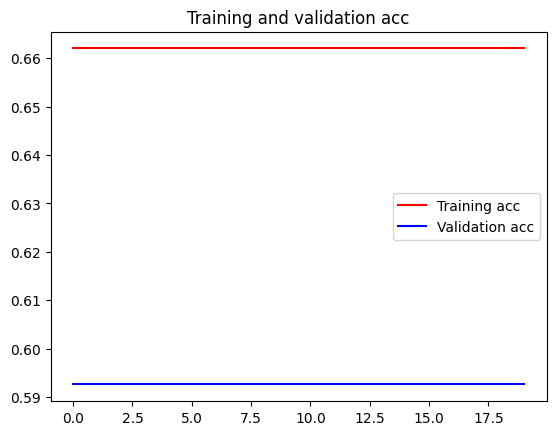

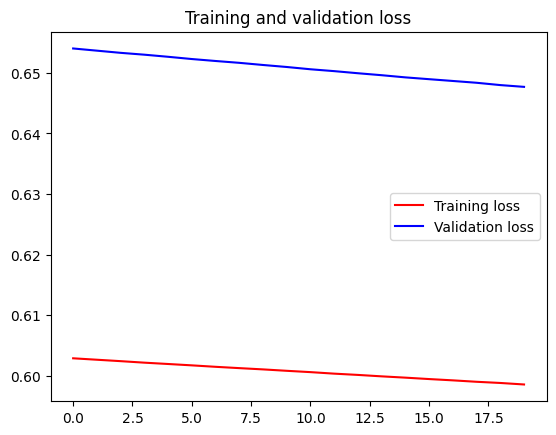

In [33]:
plot(history2_lr)

In [34]:
#Train model2_lr + epochs << doesnt help anything...
history2_lr_epochs = model2_lr.fit(
      X_train_scaled,
      y_train,
      epochs=50,
      verbose=1,
      validation_split=0.2)

Epoch 1/50
14/14 [==============================] - 0s 5ms/step - loss: 0.5984 - accuracy: 0.6620 - val_loss: 0.6473 - val_accuracy: 0.5926
Epoch 2/50
14/14 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.6620 - val_loss: 0.6471 - val_accuracy: 0.5926
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.6620 - val_loss: 0.6467 - val_accuracy: 0.5926
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.5977 - accuracy: 0.6620 - val_loss: 0.6464 - val_accuracy: 0.5833
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 0.5975 - accuracy: 0.6620 - val_loss: 0.6461 - val_accuracy: 0.5833
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.5972 - accuracy: 0.6620 - val_loss: 0.6458 - val_accuracy: 0.5833
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.5971 - accuracy: 0.6620 - val_loss: 0.6455 - val_accuracy: 0.5833
Epoch 8/50
14/14 [==

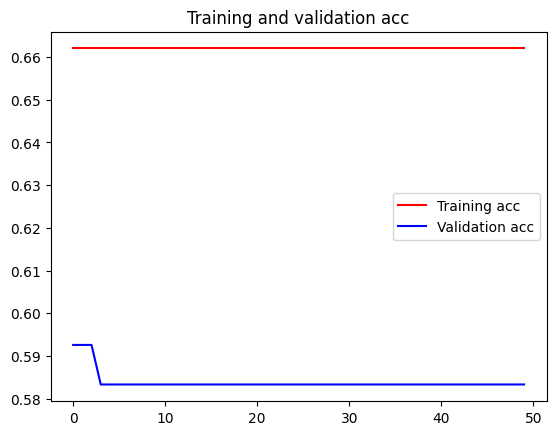

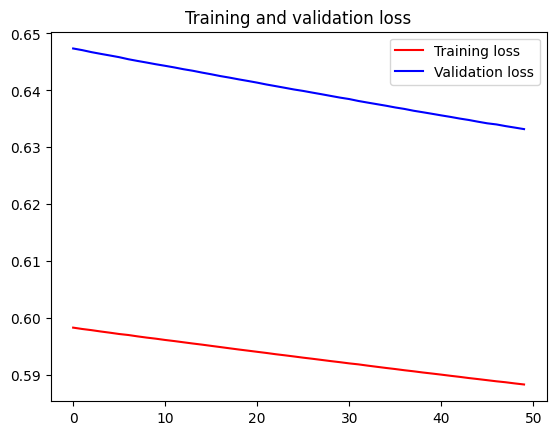

In [35]:
plot(history2_lr_epochs)

# Model2 + dropout

In [36]:
#Model improvement
#Improve model complexity and capacity to capture more information

model2_dropout = Sequential()

#Input layer + 1st hidden layer
model2_dropout.add(Dense(8, input_dim=8,activation="relu"))

#Next hidden layers
model2_dropout.add(Dense(16, activation='relu'))
model2_dropout.add(Dropout(0.2)) 
model2_dropout.add(Dense(32, activation='relu'))
model2_dropout.add(Dropout(0.2)) 

#Output layer
model2_dropout.add(Dense(1,activation="sigmoid"))
model2_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_dropout.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 72        
                                                                 
 dense_16 (Dense)            (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 793
Trainable params: 793
Non-trainable 

In [37]:
#Train model
history2_dropout = model2_dropout.fit(
      X_train_scaled,
      y_train,
      epochs=20,
      verbose=1,
      validation_split=0.2)

Epoch 1/20
14/14 [==============================] - 1s 13ms/step - loss: 0.6595 - accuracy: 0.6317 - val_loss: 0.6628 - val_accuracy: 0.6389
Epoch 2/20
14/14 [==============================] - 0s 4ms/step - loss: 0.6281 - accuracy: 0.7040 - val_loss: 0.6417 - val_accuracy: 0.6574
Epoch 3/20
14/14 [==============================] - 0s 4ms/step - loss: 0.6050 - accuracy: 0.6807 - val_loss: 0.6270 - val_accuracy: 0.6852
Epoch 4/20
14/14 [==============================] - 0s 4ms/step - loss: 0.5718 - accuracy: 0.7389 - val_loss: 0.6118 - val_accuracy: 0.6944
Epoch 5/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5552 - accuracy: 0.7273 - val_loss: 0.5927 - val_accuracy: 0.7315
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7436 - val_loss: 0.5790 - val_accuracy: 0.7222
Epoch 7/20
14/14 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.7529 - val_loss: 0.5702 - val_accuracy: 0.7130
Epoch 8/20
14/14 [=

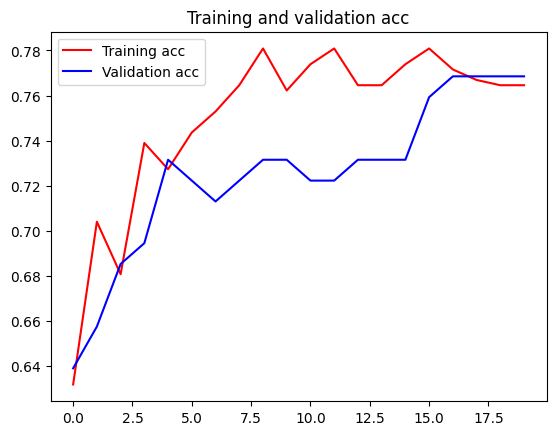

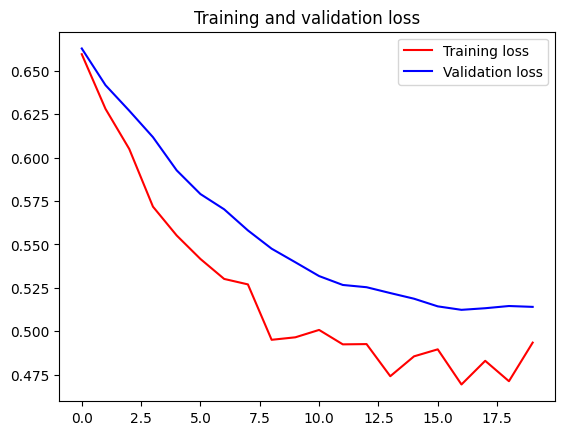

In [38]:
plot(history2_dropout)

In [39]:
#Train model
history2_50_dropout = model2_dropout.fit(
      X_train_scaled,
      y_train,
      epochs=50,
      verbose=1,
      validation_split=0.2)

Epoch 1/50
14/14 [==============================] - 0s 8ms/step - loss: 0.4674 - accuracy: 0.7716 - val_loss: 0.5124 - val_accuracy: 0.7685
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.4711 - accuracy: 0.7622 - val_loss: 0.5107 - val_accuracy: 0.7685
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.4714 - accuracy: 0.7599 - val_loss: 0.5094 - val_accuracy: 0.7778
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.4555 - accuracy: 0.7809 - val_loss: 0.5109 - val_accuracy: 0.7778
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.4628 - accuracy: 0.7762 - val_loss: 0.5095 - val_accuracy: 0.7778
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.4715 - accuracy: 0.7786 - val_loss: 0.5095 - val_accuracy: 0.7778
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.7552 - val_loss: 0.5104 - val_accuracy: 0.7685
Epoch 8/50
14/14 [==

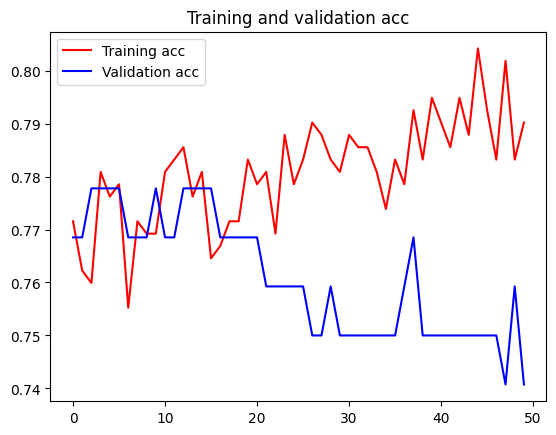

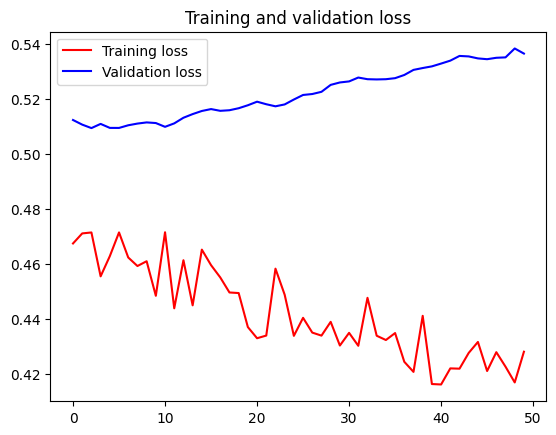

In [40]:
plot(history2_50_dropout)

In [41]:
history2_100_dropout = model2_dropout.fit(
      X_train_scaled,
      y_train,
      epochs=100,
      verbose=1,
      validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4186 - accuracy: 0.8065 - val_loss: 0.5361 - val_accuracy: 0.7315
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.7855 - val_loss: 0.5368 - val_accuracy: 0.7407
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.7855 - val_loss: 0.5378 - val_accuracy: 0.7500
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.7786 - val_loss: 0.5365 - val_accuracy: 0.7500
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.7949 - val_loss: 0.5370 - val_accuracy: 0.7500
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.7995 - val_loss: 0.5372 - val_accuracy: 0.7407
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4132 - accuracy: 0.7972 - val_loss: 0.5384 - val_accuracy: 0.7315
Epoch 8/100
1

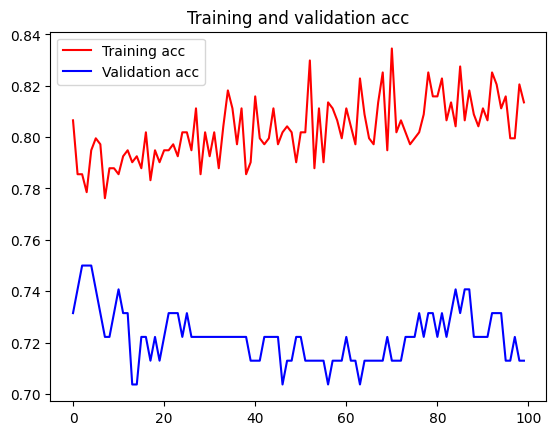

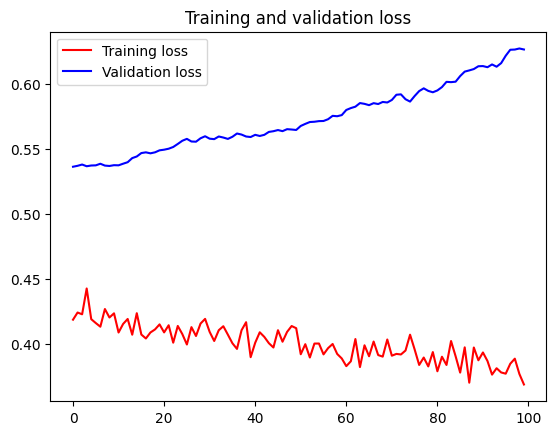

In [42]:
plot(history2_100_dropout)

In [43]:
#Model improvement
#Improve model complexity and capacity to capture more information

model3_dropout = Sequential()

#Input layer + 1st hidden layer
model3_dropout.add(Dense(8, input_dim=8,activation="relu"))

#Next hidden layers
model3_dropout.add(Dense(16, activation='relu'))
model3_dropout.add(Dropout(0.2))
model3_dropout.add(Dense(32, activation='relu'))
model3_dropout.add(Dropout(0.2))
model3_dropout.add(Dense(64, activation='relu'))
model3_dropout.add(Dropout(0.2))

#Output layer
model3_dropout.add(Dense(1,activation="sigmoid"))
model3_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3_dropout.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 8)                 72        
                                                                 
 dense_20 (Dense)            (None, 16)                144       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)               

In [44]:
#Train model
history3_dropout = model3_dropout.fit(
      X_train_scaled,
      y_train,
      epochs=20,
      verbose=1,
      validation_split=0.2)

Epoch 1/20


14/14 [==============================] - 1s 13ms/step - loss: 0.6920 - accuracy: 0.5361 - val_loss: 0.6763 - val_accuracy: 0.6296
Epoch 2/20
14/14 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.6643 - val_loss: 0.6621 - val_accuracy: 0.5926
Epoch 3/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6278 - accuracy: 0.6690 - val_loss: 0.6480 - val_accuracy: 0.5926
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.6760 - val_loss: 0.6338 - val_accuracy: 0.5926
Epoch 5/20
14/14 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.6807 - val_loss: 0.6149 - val_accuracy: 0.6019
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5531 - accuracy: 0.6993 - val_loss: 0.5947 - val_accuracy: 0.6296
Epoch 7/20
14/14 [==============================] - 0s 5ms/step - loss: 0.5283 - accuracy: 0.6900 - val_loss: 0.5803 - val_accuracy: 0.6296
Epoch 8/20
14/14 [============

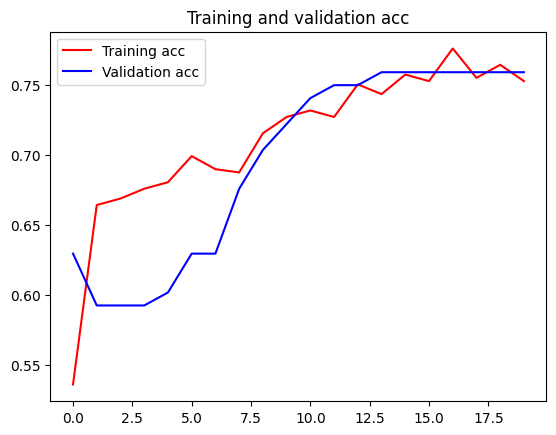

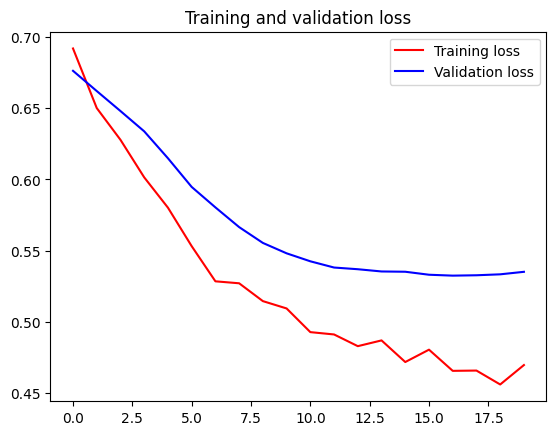

In [45]:
plot(history3_dropout)

# Model2 + batch normalization

In [46]:
#Model improvement
#Improve model complexity and capacity to capture more information

model2_bn = Sequential()

#Input layer + 1st hidden layer
model2_bn.add(Dense(8, input_dim=8, kernel_initializer='he_normal')) # 'he_normal' initializer is often used with BatchNormalization
model2_bn.add(BatchNormalization())
model2_bn.add(Activation('relu')) # Adding Activation layer separately, after BatchNormalization


#Next hidden layers
model2_bn.add(Dense(16))
model2_bn.add(BatchNormalization())
model2_bn.add(Activation('relu'))

model2_bn.add(Dense(32))
model2_bn.add(BatchNormalization())
model2_bn.add(Activation('relu'))

#Output layer
model2_bn.add(Dense(1,activation="sigmoid"))
model2_bn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_bn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dense_25 (Dense)            (None, 16)                144       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 16)               

In [47]:
#Train model
history2_bn = model2_bn.fit(
      X_train_scaled,
      y_train,
      epochs=20,
      verbose=1,
      validation_split=0.2)

Epoch 1/20
14/14 [==============================] - 1s 18ms/step - loss: 0.6105 - accuracy: 0.6667 - val_loss: 0.6730 - val_accuracy: 0.5463
Epoch 2/20
14/14 [==============================] - 0s 4ms/step - loss: 0.5527 - accuracy: 0.7366 - val_loss: 0.6512 - val_accuracy: 0.6019
Epoch 3/20
14/14 [==============================] - 0s 4ms/step - loss: 0.5301 - accuracy: 0.7133 - val_loss: 0.6311 - val_accuracy: 0.6667
Epoch 4/20
14/14 [==============================] - 0s 4ms/step - loss: 0.5218 - accuracy: 0.7436 - val_loss: 0.6170 - val_accuracy: 0.6667
Epoch 5/20
14/14 [==============================] - 0s 5ms/step - loss: 0.5145 - accuracy: 0.7459 - val_loss: 0.6045 - val_accuracy: 0.6296
Epoch 6/20
14/14 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.7459 - val_loss: 0.5936 - val_accuracy: 0.6574
Epoch 7/20
14/14 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.7529 - val_loss: 0.5833 - val_accuracy: 0.6667
Epoch 8/20
14/14 [=

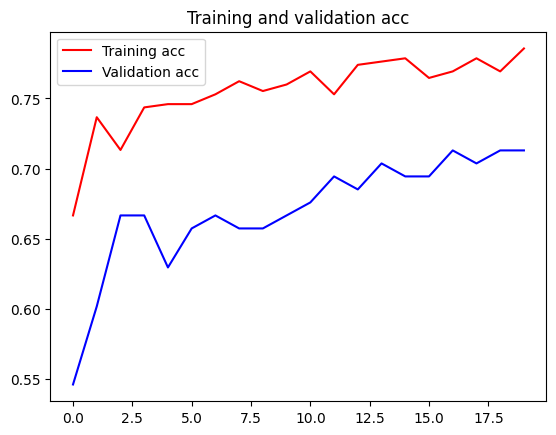

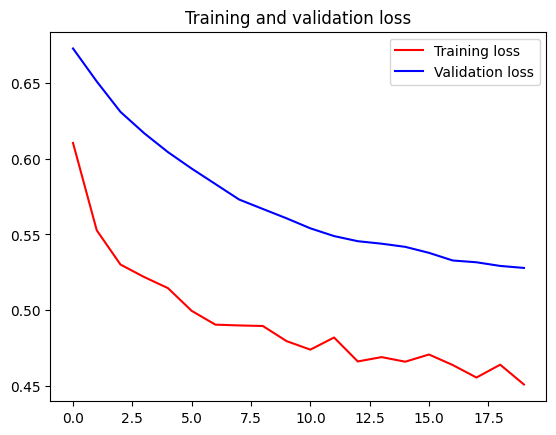

In [48]:
plot(history2_bn)

In [49]:
history2_100_bn = model2_bn.fit(
      X_train_scaled,
      y_train,
      epochs=100,
      verbose=1,
      validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4343 - accuracy: 0.7716 - val_loss: 0.5258 - val_accuracy: 0.6944
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.7669 - val_loss: 0.5249 - val_accuracy: 0.7037
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.7622 - val_loss: 0.5269 - val_accuracy: 0.6944
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4483 - accuracy: 0.7879 - val_loss: 0.5267 - val_accuracy: 0.7037
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.7855 - val_loss: 0.5265 - val_accuracy: 0.7037
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4406 - accuracy: 0.7902 - val_loss: 0.5252 - val_accuracy: 0.7407
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4635 - accuracy: 0.7669 - val_loss: 0.5296 - val_accuracy: 0.7222
Epoch 8/100
1

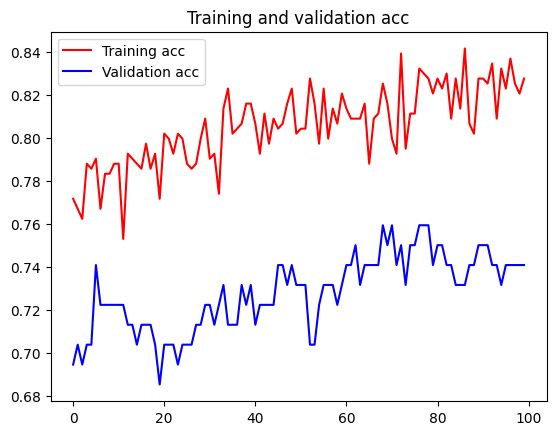

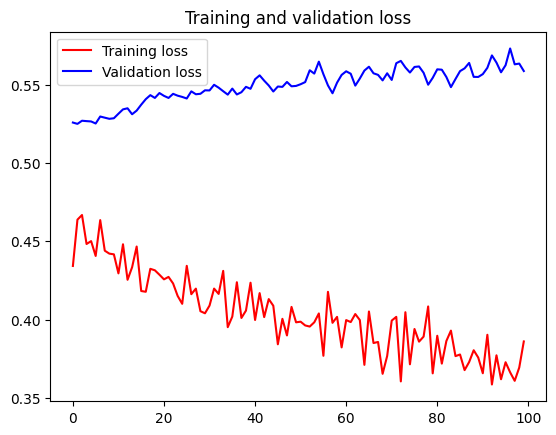

In [50]:
plot(history2_100_bn)

In [51]:
#Model improvement
#Improve model complexity and capacity to capture more information

model2_bn_es = Sequential()

#Input layer + 1st hidden layer
model2_bn_es.add(Dense(8, input_dim=8, kernel_initializer='he_normal')) # 'he_normal' initializer is often used with BatchNormalization
model2_bn_es.add(BatchNormalization())
model2_bn_es.add(Activation('relu')) # Adding Activation layer separately, after BatchNormalization


#Next hidden layers
model2_bn_es.add(Dense(16))
model2_bn_es.add(BatchNormalization())
model2_bn_es.add(Activation('relu'))

model2_bn_es.add(Dense(32))
model2_bn_es.add(BatchNormalization())
model2_bn_es.add(Activation('relu'))

#Output layer
model2_bn_es.add(Dense(1,activation="sigmoid"))
model2_bn_es.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_bn_es.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 8)                 72        
                                                                 
 batch_normalization_3 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 8)                 0         
                                                                 
 dense_29 (Dense)            (None, 16)                144       
                                                                 
 batch_normalization_4 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 16)               

In [52]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history2_100_bn_es = model2_bn_es.fit(
      X_train_scaled,
      y_train,
      epochs=100,
      verbose=1,
      validation_split=0.2,
      callbacks=[early_stopping])

Epoch 1/100
14/14 [==============================] - 1s 15ms/step - loss: 0.7447 - accuracy: 0.4895 - val_loss: 0.6872 - val_accuracy: 0.5833
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.6364 - val_loss: 0.6494 - val_accuracy: 0.6204
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5804 - accuracy: 0.7203 - val_loss: 0.6263 - val_accuracy: 0.6944
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5632 - accuracy: 0.7203 - val_loss: 0.6131 - val_accuracy: 0.6667
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5371 - accuracy: 0.7436 - val_loss: 0.6010 - val_accuracy: 0.6759
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5171 - accuracy: 0.7459 - val_loss: 0.5921 - val_accuracy: 0.6852
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5147 - accuracy: 0.7483 - val_loss: 0.5841 - val_accuracy: 0.6852
Epoch 8/100


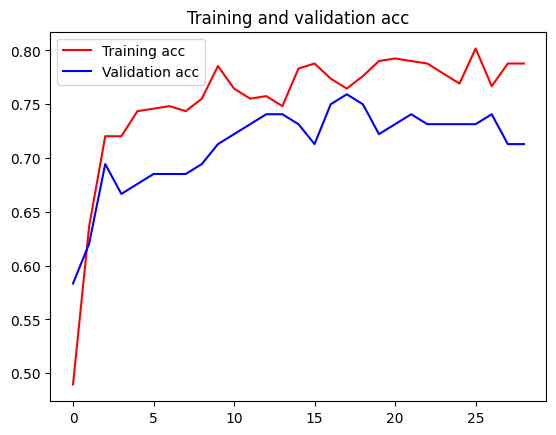

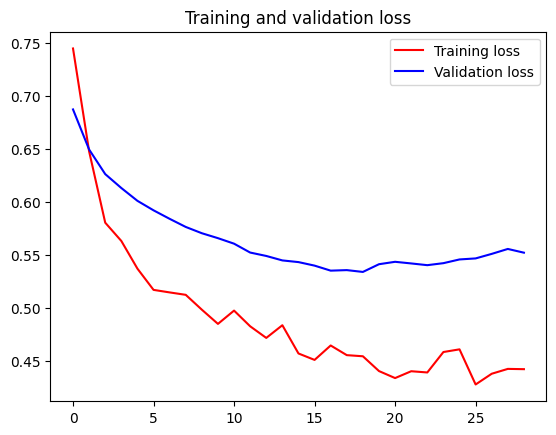

In [53]:
plot(history2_100_bn_es)